# demo for onboard 4 leds and 4 btns
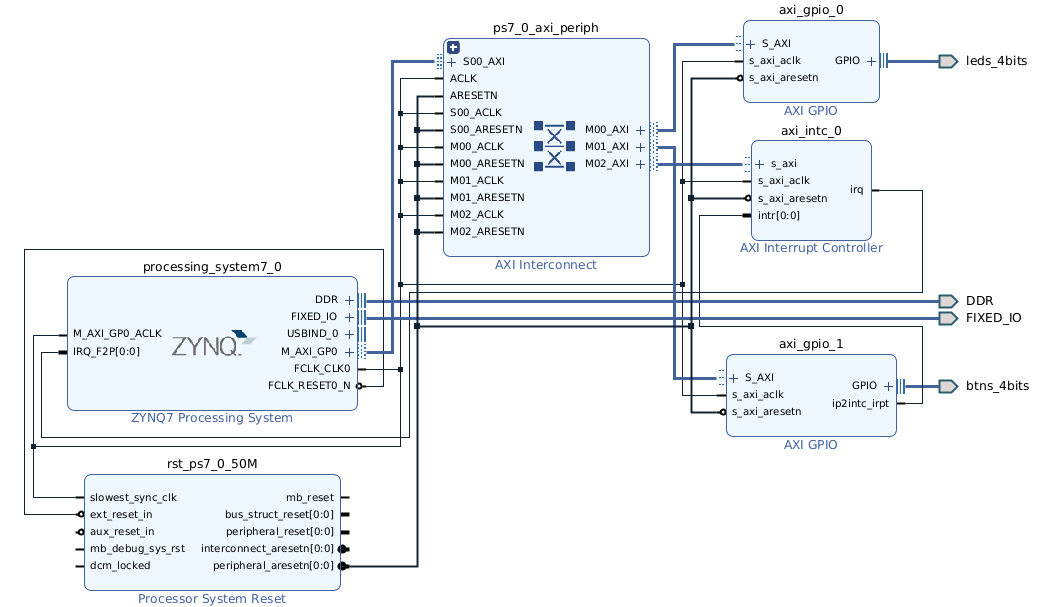

In [1]:
from pynq import Overlay
from pynq import Interrupt
from pynq import GPIO
leds_btns = Overlay("./overlay/btnLeds.bit")

In [2]:
# leds_btns.interrupt_pins

{'axi_gpio_1/ip2intc_irpt': {'controller': 'axi_intc_0',
  'index': 0,
  'fullpath': 'axi_gpio_1/ip2intc_irpt'},
 'axi_intc_0/intr': {'controller': 'axi_intc_0',
  'index': 0,
  'fullpath': 'axi_intc_0/intr'}}

In [3]:
# intr_inst = Interrupt('axi_gpio_1/ip2intc_irpt')

In [4]:
from pynq.lib import AxiGPIO
from time import sleep

In [5]:
axi_gpio0 = leds_btns.ip_dict['axi_gpio_0']
leds = AxiGPIO(axi_gpio0).channel1
leds.setdirection('out')
leds.setlength(4)

In [6]:
axi_gpio1 = leds_btns.ip_dict['axi_gpio_1']
btns = AxiGPIO(axi_gpio1).channel1
btns.setdirection('in')
btns.setlength(4)

In [7]:
for i in range(16):
    leds.write(i, 0xf)
    sleep(0.2)

In [8]:
import asyncio

async def handle(num):
    while True:
        await btns[num].wait_for_value_async(1)
        while btns[num].read():
            leds[num].toggle()
            await asyncio.sleep(0.1)
        leds[num].off()
handler_task = [asyncio.ensure_future(handle(i)) for i in range(4)]